### Importok

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1 Bevezető feladatok

#### 1.1 NumPy Tömbműveletek - új adat


Definiáljunk egy A=np.array([ ]) tömböt és töltsük fel tetszés szerint néhány elemmel. Írassuk
ki a tömb maximumát! Ezt követően fűzzünk hozzá egy felhasználótól bekért elemet és nézzük
meg ezután is a tömb maximumát!


In [2]:
A = np.array([])
A = np.append(A, [1, -5, 21, 13, -2])

print(A.max())
A = np.append(A, int(input("Kérek egy számot")))

print(A.max())

21.0
22.0


#### 1.2 Plotolás - Kéttárolós rendszer

Adott egy kéttárolós tag, melynek válaszfüggvénye az alábbi alakban írható fel:

y(t) = $A_0 · [1 - e^{−ζ·ω_n·t} · (cos(ω_d·t)+{\frac{ζ}{\sqrt{1-ζ^2}} · sin(ω_d·t)})]$

ahol:
- y(t) a rendszer válaszfüggvénye
- $A_0$ a rendszer állandósult értéke
- $ω_n$ a rendszer csillapítatlan sajátkörfrekvenciája
- ζ a rendszer csillapítása
- $ω_d$ a rendszer csillapított sajátkörfrekvenciája és
$ω_d = ω_n·\sqrt{1-ζ^2}$

Ábrázoljuk ezt a függvényt a t ∈ [0, 2.5] intervallumon, ha a rendszer $A_0$ ≡ 1, $ω_n$ = 10  [$\frac{rad}{s}$] és ζ = 0.3 paraméterekkel rendelkezik! A vízszintes tengelyfelirat legyen "idő - t [s]", a
függőleges pedig "Kimenet - y [-]"! A diagram címe pedig legyen "Kéttárolós rendszer"!


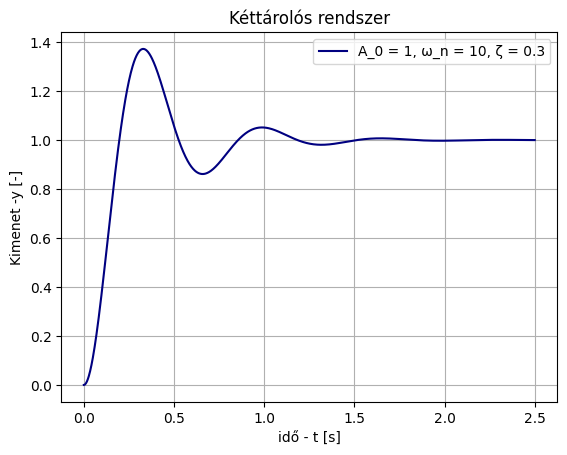

In [18]:
# Létrehozzuk linspace segítségével a pontokat!
t = np.linspace(0, 2.5, 1000)

# Kiszámítjuk a hozzátartozó függvényértékeket!
A_0 = 1
ω_n = 10
ζ = 0.3
ω_d = ω_n * np.sqrt(1 - np.square(ζ))

y = A_0 * (
    1
    - (
        np.exp(-(ζ * ω_n * t))
        * (np.cos(ω_d * t) + (ζ / np.sqrt(1 - np.square(ζ))) * np.sin(ω_d * t))
    )
)

# Hozzuk létre a 'rajzterületet'!
fig, ax = plt.subplots()

# Plotolás és testreszabás

ax.plot(t, y, color="navy", label="A_0 = 1, ω_n = 10, ζ = 0.3")

ax.set_xlabel("idő - t [s]")
ax.set_ylabel("Kimenet -y [-]")
ax.set_title("Kéttárolós rendszer")
ax.grid(True)
ax.legend()  # Ezzel jelenítem meg a label-eket
plt.show()

#### 1.3 Függvények - Másodfokú egyenlet

Készítsünk egy masodfoku(a,b,c) függvényt, amely megoldja a

$a{x^2}$ + bx + c = 0

alakban felírt másodfokú egyenletet!
Segítségül a másodfokú egyenlet megoldóképlete:

$x_{1,2} = \frac{-b \pm \sqrt{b^2-4ac}}{2a}$

In [17]:
def masodfoku(a, b, c):
    x1 = round((-b + np.sqrt(np.square(b) - 4 * a * c)) / (2 * a), 4)
    x2 = round((-b - np.sqrt(np.square(b) - 4 * a * c)) / (2 * a), 4)
    return x1, x2


print(masodfoku(1, -5, 5))

(3.618, 1.382)


### 2 Gyakorló feladatok

#### 2.1 Feszültségek

Ábrázoljuk az
u : [−2, 8] ⊂ R → R, u(t) = $\frac{A_0}{π}(sin(3t)-\frac{sin(6t)}{2}+\frac{sin(9t)}{3}-\frac{sin(12t)}{4})$

függvényt, $A_0$ = 3, 4, 5 értékekre! Készítsük el a tengelyfeliratokat: feszültséget ábrázolunk idő
függvényében! Nevezzük el a grafikont és kapcsoljuk be a gridet!
Mire hasonlít ez és hogyan lehetne "folytatni"? Készítsük el úgy is a grafikont, hogy egy
kiválasztott $A_0$ értékre egyszerre látszódik 2, 4, 6, 8 és 10 tag esetén is a függvény!


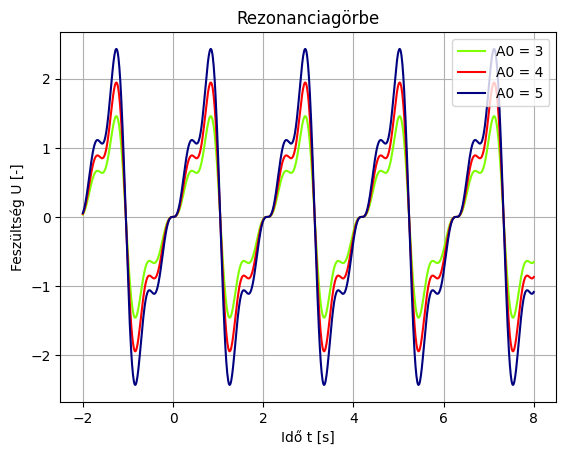

In [28]:
# Létrehozzuk linspace segítségével a pontokat!
t = np.linspace(-2, 8, 1000)

# Létrehozzuk a függvényt!
def feszultseg(A_0):
    return (A_0 / np.pi) * (
        np.sin(3 * t) - (np.sin(6 * t) / 2) + (np.sin(9 * t) / 3) - (np.sin(12 * t) / 4)
    )

# Kiszámítjuk a hozzátartozó függvényértékeket!
A_0 = 3
u_1 = feszultseg(A_0)
A_0 = 4
u_2 = feszultseg(A_0)
A_0 = 5
u_3 = feszultseg(A_0)

# Hozzuk létre a 'rajzterületet'!
fig, ax = plt.subplots()

# Plotolás és testreszabás

ax.plot(t, u_1, color="chartreuse", label="A0 = 3")
ax.plot(t, u_2, color="red", label="A0 = 4")
ax.plot(t, u_3, color="navy", label="A0 = 5")
ax.set_xlabel("Idő t [s]")
ax.set_ylabel("Feszültség U [-]")
ax.set_title("Rezonanciagörbe")
ax.grid(True)
ax.legend()  # Ezzel jelenítem meg a label-eket
plt.show()

#### 2.2 Relativisztikus gyorsulások

Ismeretes, hogy a fénysebességgel összemérhető sebességeken a Newtoni mechanika axiómái
elérik a határaikat, és figyelembe kell vennünk a relativisztikus hatásokat. Az egyik fontos
relativisztikus hatás az úgynevezett relativisztikus tömegváltozás, amely azt mondja ki, hogy
ha a test nyugalmi tömege m_0, sebessége pedig a megfigyelőhöz képest v, akkor a megfigyelő
rendszerében a test tömege:

$m = \frac{m_{0}}{\sqrt[]{1-\frac{v^2}{c^2}}}$

Számoljuk ki a fénysebesség 10%, 50%, 90% és 99%-nál a relativisztikus tömegeket! Az egyes
sebességeken hány százalékkal tér el a relativisztikus tömeg a nyugalmi tömegtől? Gondolkodjunk el azon, hogy mekkora eltérés esetén érezzük úgy, hogy még eltekinthetünk a relativisztikus
hatásoktól?

In [7]:
m0 = 12
c = 299792458
v01 = c / 10
v05 = c / 2
v09 = c * 0.9
v099 = c * 0.99

m01 = m0 / np.sqrt(1 - (v01 * v01) / (c * c))
m05 = m0 / np.sqrt(1 - (v05 * v05) / (c * c))
m09 = m0 / np.sqrt(1 - (v09 * v09) / (c * c))
m099 = m0 / np.sqrt(1 - (v099 * v099) / (c * c))
print(
    f"{m0} g nyugalmi tömegű test tömege a fénysebesség\n10%-nál: {m01}\n50%-nál: {m05}\n90%-nál: {m09}\n99%-nál: {m099}"
)

12 g nyugalmi tömegű test tömege a fénysebesség
10%-nál: 12.060453783110544
50%-nál: 13.85640646055102
90%-nál: 27.529888064467407
99%-nál: 85.06574460100049


#### 2.3 Főtéri felújítások

Kübekcsakra főterének alapja egy szabályos m×n-es téglalap. A kübekcsakrai polgármesteri
hivatal egy EU-s pályázat keretén belül fix összegű támogatást nyert el a főtér felújítására,
melynek során fix a×a méretű gránitlapokkal fogják lefedni a teret. A lapokat se elvágni, se
egymásra helyezni nem lehet, illetve a tér oldalaival párhuzamosan kell elhelyezni az összeset.
A teljes teret le kell fedni, viszont nem probléma, ha annál nagyobb területet fednek le a lapok.
Összesen hány lapra van szükség a felújításhoz?

In [10]:
m = 150
n = 220

a = 7

print(f"A tér lefedéséhez {np.ceil(m/a) * np.ceil(n/a)} lapra van szükség.")

21.428571428571427 22.0
31.428571428571427 32.0
A tér lefedéséhez 704.0 lapra van szükség.


#### 2.4 Web Scraping

A stringkezelés egyik nagy népszerűségnek örvendő alkalmazása az úgynevezett Web Scraping.
Ennek célja, hogy a scraping bot minél több adatot nyerjen ki, miközben véletlenszerűen járja
a honlapokat.
Adott az alábbi (fiktív) URL: URL="https:##idokep.hu#archive#2012#august". Ez a hivatkozás sajnos érvénytelen, ezért az a feladatunk, hogy kijavítsuk:
1. Cseréljük le a # karaktereket /-re, hogy a link formátuma érvényes legyen!
2. A scraping bot célja, hogy minden éven és hónapon végigmenjen! Írjuk át a linket úgy,
hogy a 2023 september fülre menjen!
3. A könnyebb módosításért keressük meg, hogy a linkben hanyadik indexű elemtől kezdődik
az évszám.

In [14]:
URL = "https:##idokep.hu#archive#2012#august"
URL = URL.replace("#", "/")
index = URL.index("2")
URL = URL[:index] + "2023/september"
print(URL)

https://idokep.hu/archive/2023/september


### 3 Ajánlott feladatok

#### 3.1 Tornyok

Petike nagyon szeret tornyokat építeni, ezért egy N darabból álló készletet kapott mamájától.
Az építőelemek magassága bármilyen pozitív egész szám lehet, azaz 1, 2, 3, ... és minden
méretből tetszőlegesen sok lehet neki. Ezeket tároljuk el a epitoelemek[] tömbben. Pistike meg szeretne építeni minden olyan tornyot úgy, hogy az azonos méretű elemeket pakolja
egymásra.
1. Határozzuk meg összesen hány tornyot tud építeni Pistike! Segítség: Ismerünk-e olyan
adatstruktúrát, amely nem tartalmazhat duplikált elemeket?
2. Határozzuk meg melyik toronyban van a legtöbb elem!

In [18]:
epitoelemek = [1, 4, 4, 4, 5, 7, 7]
elemek = set(epitoelemek)
legtobb = 0
for elem in elemek:
    legtobb = max(legtobb, epitoelemek.count(elem))

print(f"Tornyok száma: {len(elemek)}, legtöbb elemű torony: {legtobb}")

Tornyok száma: 4, legtöbb elemű torony: 3


#### 3.2 Túl hosszú szavak...

A mérnökök köztudottan szeretnek energiahatékonyak lenni és jelentős fájdalmat okoz számukra, ha gyakran le kell írniuk túl hosszú szavakat és kifejezéseket, mint például a "zsugorkötés",
vagy a "centrifugál regulátor". Ezért bevezetik a következő rövidítést: a legalább 10 karakter hosszú kifejezéseket átírják úgy, hogy csak az első és utolsó karaktereket tartjuk meg és a
köztes karaktereket helyettesítjük a karakterek számával:
- "cica" → "cica" (Mert csak 4 karakter hosszú.)
- "centrifugal regulator" → "c19r" (Mert 19 karakter van a c és az r között.)

Írjunk egy programot, mely szükség esetén rövidíti a kifejezéseket!


In [21]:
szo = "centrifugal regulator"
szohossz = len(szo)
if (szohossz >= 10):
    szo = szo[0] + str((szohossz - 2)) + szo[-1]

print(szo)

c19r


#### 3.3 Jegyzettömb+-

Petike nemrég készített egy Jegyzettömb+- alkalmazást, amelyben a gyors és hatékony gépelésre
törekedett. Az alkalmazás két különböző funkciót támogat:
1. A szavakat begépelhetjük "hagyományosan" azaz egy adott lépésben egy betűt;
2. De lehetőségünk van egy adott lépésben a szó végére másolni a korábban begépelt szöveg
egy tetszőlegesen hosszú, folytonos substringjét.

Tegyük fel, hogy a begépelni kívánt s string csupán n darab, kisbetűs latin karakterből áll.
Írjunk egy programot, mely eldönti, hogy ezen s string begépelhető-e szigorúan kevesebb, mint
n lépés alatt!

Példa 1

Bemenet:

n = 10; s = "centrifuga"

Kimenet: "NEM"

Itt az egyetlen lehetőségünk, hogy betűnként gépeljük be a szót, így n lépésre van szükség.

Példa 2

Bemenet:

n = 6; s = "banana"

Kimenet: "IGEN"

Itt megtehetjük, hogy begépeljük a "ban" részt, másoljuk az "an" substringet és végül leírjuk
az "a"-t, ami összesen 3 + 1 + 1 = 5 < 6 lépés.

In [31]:
s = "banana"
hossz = len(s)
kimenet = "NEM"
ismetles = 1
for i in range(hossz):
    ismetles = s.count(s[i:i + 2])

if ismetles > 1:
    kimenet = "IGEN"

print(kimenet)

IGEN
